In [1]:
import numpy as np

# Q1,Q2
a = np.array([[1,2,3,4,5],
              [5,4,3,2,1],
              [3,2,1,4,5],
              [3,4,5,2,1]])
b = np.array([[1,2,3,4],
              [5,4,3,2],
              [3,2,1,4],
              [3,4,5,2],
              [4,2,1,3]])

# Q3
print(a.dot(b))

# Q4
print(np.multiply(a,b.T))

# Q5
print(np.mean(a))
print(np.median(a))

# Q6
print(a.T)
print(a.dot(b))
print(np.linalg.det(a.dot(b)))

# Q7
print(a[:,1])

[[52 42 37 43]
 [44 42 41 47]
 [48 42 41 43]
 [48 42 37 47]]
[[ 1 10  9 12 20]
 [10 16  6  8  2]
 [ 9  6  1 20  5]
 [12  8 20  4  3]]
3.0
3.0
[[1 5 3 3]
 [2 4 2 4]
 [3 3 1 5]
 [4 2 4 2]
 [5 1 5 1]]
[[52 42 37 43]
 [44 42 41 47]
 [48 42 41 43]
 [48 42 37 47]]
1.9099388737231554e-11
[2 4 2 4]


In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

nltk.download('twitter_samples')

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print('Number of positive tweets: ', len('all_positive_tweets'))
print('Number of negative tweets: ', len('all_negative_tweets'))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


Number of positive tweets:  19
Number of negative tweets:  19

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


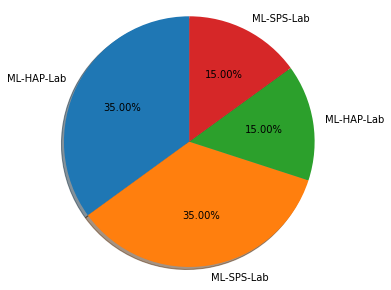

In [3]:
# Declaring a figure with a custom size
fig = plt.figure(figsize=(5,5))

# labels for the classes
labels = 'ML-HAP-Lab', 'ML-SPS-Lab', 'ML-HAP-Lab', 'ML-SPS-Lab'

# Sizes for each slide
sizes = [35, 35, 15, 15]

plt.pie(sizes, labels=labels, autopct='%.2f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

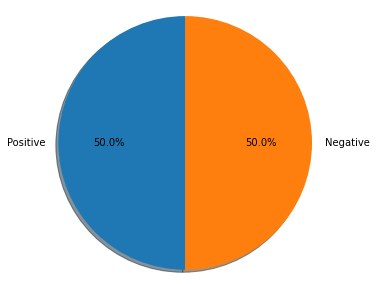

In [4]:
fig = plt.figure(figsize=(5,5))

labels = 'Positive', 'Negative'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()

In [5]:
print('\033[92m'+all_positive_tweets[random.randint(0,len(all_positive_tweets))])
print('\033[91m'+all_negative_tweets[random.randint(0,len(all_negative_tweets))])

@beatport to team up with @Spotify . Hoping to find the Beatport collection via Spotify soon! :) http://t.co/Lvycav0kNH
@KrystalHosting Was just about to push a client your way for some hosting. Maybe I had better wait till next week :(


Sentiment Analysis

In [10]:
# We have our tweets data already
# Now lets download some stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import re # library for regular Expression
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [7]:
tweet = all_positive_tweets[random.randint(0,len(all_positive_tweets))]
print('\033[92m'+tweet)
print('\033[93m')

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet);

# remove hashtags
# only removing the hash sign from the word
tweet2 = re.sub(r'#','',tweet2)

print(tweet2)

@deadmau5 dieback music pack totally worth it! It's awesome :) #dota2

@deadmau5 dieback music pack totally worth it! It's awesome :) dota2


In [8]:
# tokenize the tweets

print()
print('\033[92m',tweet2)
print('\033[93m')

tokenizer = TweetTokenizer(preserve_case=False)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string: ')
print(tweet_tokens)


 @deadmau5 dieback music pack totally worth it! It's awesome :) dota2


Tokenized string: 
['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'it', '!', "it's", 'awesome', ':)', 'dota', '2']


In [11]:
# Remove stopwords

stopwords_english = stopwords.words('english')

print(stopwords_english)

print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print(tweets_clean)

['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'it', '!', "it's", 'awesome', ':)', 'dota', '2']
['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'awesome', ':)', 'dota', '2']


In [13]:
print(tweets_clean)

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed words: ',end='')
print(tweets_stem)

['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'awesome', ':)', 'dota', '2']
stemmed words: ['@deadmau5', 'dieback', 'music', 'pack', 'total', 'worth', 'awesom', ':)', 'dota', '2']


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

print(tweets_clean)

wordnet_lemmatizer = WordNetLemmatizer()

tweets_lem = []
for word in tweets_clean:
  lem_words = wordnet_lemmatizer.lemmatize(word)
  tweets_lem.append(lem_words)

print('lemmatized words: ',end='')
print(tweets_lem)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'awesome', ':)', 'dota', '2']
lemmatized words: ['@deadmau5', 'dieback', 'music', 'pack', 'totally', 'worth', 'awesome', ':)', 'dota', '2']


Perform preprocessing tasks on any text dataset

In [16]:
import nltk
from nltk.corpus import movie_reviews
import matplotlib.pyplot as plt
import random

In [17]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [18]:
import os

pos_path = f'../root/nltk_data/corpora/movie_reviews/pos'
neg_path = f'../root/nltk_data/corpora/movie_reviews/neg'

pos_review = []
neg_review = []

pos_dir = os.listdir(pos_path)
neg_dir = os.listdir(neg_path)

for file in pos_dir:
  with open(f'{pos_path}/{file}', 'rt') as myfile:
    pos_review.append(myfile.read())

for file in neg_dir:
  with open(f'{neg_path}/{file}', 'rt') as myfile:
    neg_review.append(myfile.read())

print(len(pos_review))
print(len(neg_review))

1000
1000


In [19]:
# Now we have the data, so we need to preprocess this data like:
  # Tokenizing the string
  # Lowercasing
  # Removing stop words and punctuations
  # Stemming and Lemmatizing

nltk.download('stopwords')

import string # for string operations
from nltk.corpus import stopwords # module for stop words
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
movie_reviews = pos_review + neg_review

sample = movie_reviews[random.randint(0,len(movie_reviews)-1)]

In [21]:
# Removing any kind of links

sample2 = re.sub(r'https?:\/\/.*[\r\n]*','',sample)
sample2 = re.sub(r'#','',sample2)

print(sample2)

linda fiorentino disappeared off the radar after a deservedly heralded turn in the cable pic the last seduction , and her being cast as dogma's lead is nothing short of inexplicable . 
she's still in fine form as bethany , an abortion clinic worker who's lost her faith . 
one night , a visitor from heaven makes a fiery entrance in bethany's bedroom . 
he is metatron ( alan rickman ) , the voice of god , and he needs her help : she must stop two fallen angels from entering a new jersey church-the fate of the universe depends on it . 
god would do it him/herself , but he/she is . . . missing , having taken up human form somewhere on earth never to be heard from again . 
bethany is joined on her road trip to the garden state by the " prophets " jay ( jason mewes ) and silent bob ( kevin smith , doing double-duty ) , the slacker minstrels who have appeared in all of smith's films thus far . 
at some point , rock drops naked out of the sky as rufus , the undocumented ( and very black ) " th

In [22]:
# Tokenizing the review

from nltk.tokenize import word_tokenize
nltk.download('punkt')

sample_tokens = word_tokenize(sample2)
print(sample_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['linda', 'fiorentino', 'disappeared', 'off', 'the', 'radar', 'after', 'a', 'deservedly', 'heralded', 'turn', 'in', 'the', 'cable', 'pic', 'the', 'last', 'seduction', ',', 'and', 'her', 'being', 'cast', 'as', 'dogma', "'s", 'lead', 'is', 'nothing', 'short', 'of', 'inexplicable', '.', 'she', "'s", 'still', 'in', 'fine', 'form', 'as', 'bethany', ',', 'an', 'abortion', 'clinic', 'worker', 'who', "'s", 'lost', 'her', 'faith', '.', 'one', 'night', ',', 'a', 'visitor', 'from', 'heaven', 'makes', 'a', 'fiery', 'entrance', 'in', 'bethany', "'s", 'bedroom', '.', 'he', 'is', 'metatron', '(', 'alan', 'rickman', ')', ',', 'the', 'voice', 'of', 'god', ',', 'and', 'he', 'needs', 'her', 'help', ':', 'she', 'must', 'stop', 'two', 'fallen', 'angels', 'from', 'entering', 'a', 'new', 'jersey', 'church-the', 'fate', 'of', 'the', 'universe', 'depends', 'on', 'it', '.', 'god', 'would', 'do', 'it', 'him/herself', ',', 'but', 'he/she', 'is', '.', '.', '.', 'missing', ',', 'having', 'taken', 'up', 'human', 'fo

In [23]:
# Removing stop words and punctuations

stopwords_english = stopwords.words('english')
punctuation_english = string.punctuation

In [24]:
# Cleaning the review

review_clean = []

for word in sample_tokens:
  if (word not in stopwords_english and word not in punctuation_english):
    review_clean.append(word)

print(review_clean)

['linda', 'fiorentino', 'disappeared', 'radar', 'deservedly', 'heralded', 'turn', 'cable', 'pic', 'last', 'seduction', 'cast', 'dogma', "'s", 'lead', 'nothing', 'short', 'inexplicable', "'s", 'still', 'fine', 'form', 'bethany', 'abortion', 'clinic', 'worker', "'s", 'lost', 'faith', 'one', 'night', 'visitor', 'heaven', 'makes', 'fiery', 'entrance', 'bethany', "'s", 'bedroom', 'metatron', 'alan', 'rickman', 'voice', 'god', 'needs', 'help', 'must', 'stop', 'two', 'fallen', 'angels', 'entering', 'new', 'jersey', 'church-the', 'fate', 'universe', 'depends', 'god', 'would', 'him/herself', 'he/she', 'missing', 'taken', 'human', 'form', 'somewhere', 'earth', 'never', 'heard', 'bethany', 'joined', 'road', 'trip', 'garden', 'state', '``', 'prophets', '``', 'jay', 'jason', 'mewes', 'silent', 'bob', 'kevin', 'smith', 'double-duty', 'slacker', 'minstrels', 'appeared', 'smith', "'s", 'films', 'thus', 'far', 'point', 'rock', 'drops', 'naked', 'sky', 'rufus', 'undocumented', 'black', '``', 'thirteenth

In [25]:
# Stemming

stemmer = PorterStemmer()

review_stem = []

for word in review_clean:
  stem_word = stemmer.stem(word)
  review_stem.append(stem_word)

print(review_stem)

['linda', 'fiorentino', 'disappear', 'radar', 'deservedli', 'herald', 'turn', 'cabl', 'pic', 'last', 'seduct', 'cast', 'dogma', "'s", 'lead', 'noth', 'short', 'inexplic', "'s", 'still', 'fine', 'form', 'bethani', 'abort', 'clinic', 'worker', "'s", 'lost', 'faith', 'one', 'night', 'visitor', 'heaven', 'make', 'fieri', 'entranc', 'bethani', "'s", 'bedroom', 'metatron', 'alan', 'rickman', 'voic', 'god', 'need', 'help', 'must', 'stop', 'two', 'fallen', 'angel', 'enter', 'new', 'jersey', 'church-th', 'fate', 'univers', 'depend', 'god', 'would', 'him/herself', 'he/sh', 'miss', 'taken', 'human', 'form', 'somewher', 'earth', 'never', 'heard', 'bethani', 'join', 'road', 'trip', 'garden', 'state', '``', 'prophet', '``', 'jay', 'jason', 'mew', 'silent', 'bob', 'kevin', 'smith', 'double-duti', 'slacker', 'minstrel', 'appear', 'smith', "'s", 'film', 'thu', 'far', 'point', 'rock', 'drop', 'nake', 'sky', 'rufu', 'undocu', 'black', '``', 'thirteenth', 'apostl', '``', 'offer', 'assist', 'divin', 'strip

In [26]:
# Lemmatizing

wordnet_lemmatizer = WordNetLemmatizer()

review_lem = []

for word in review_stem:
  lem_word = wordnet_lemmatizer.lemmatize(word)
  review_lem.append(lem_word)

print(review_lem)

['linda', 'fiorentino', 'disappear', 'radar', 'deservedli', 'herald', 'turn', 'cabl', 'pic', 'last', 'seduct', 'cast', 'dogma', "'s", 'lead', 'noth', 'short', 'inexplic', "'s", 'still', 'fine', 'form', 'bethani', 'abort', 'clinic', 'worker', "'s", 'lost', 'faith', 'one', 'night', 'visitor', 'heaven', 'make', 'fieri', 'entranc', 'bethani', "'s", 'bedroom', 'metatron', 'alan', 'rickman', 'voic', 'god', 'need', 'help', 'must', 'stop', 'two', 'fallen', 'angel', 'enter', 'new', 'jersey', 'church-th', 'fate', 'univers', 'depend', 'god', 'would', 'him/herself', 'he/sh', 'miss', 'taken', 'human', 'form', 'somewher', 'earth', 'never', 'heard', 'bethani', 'join', 'road', 'trip', 'garden', 'state', '``', 'prophet', '``', 'jay', 'jason', 'mew', 'silent', 'bob', 'kevin', 'smith', 'double-duti', 'slacker', 'minstrel', 'appear', 'smith', "'s", 'film', 'thu', 'far', 'point', 'rock', 'drop', 'nake', 'sky', 'rufu', 'undocu', 'black', '``', 'thirteenth', 'apostl', '``', 'offer', 'assist', 'divin', 'strip

In [ ]:
Pandas Library

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
# drive.mount('/content/drive')

data = pd.read_csv('/content/sample_data/mtcars.csv')
d = pd.crosstab(index=data['cyl'],columns="count",dropna=True)
print(d)

col_0  count
cyl         
4         11
6          7
8         14


In [28]:
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
data.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [30]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [32]:
print("Total null data:",data.sum())

Total null data: Unnamed: 0    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                       642.9
cyl                                                         198
disp                                                     7383.1
hp                                                         4694
drat                                                     115.09
wt                                                      102.952
qsec                                                     571.16
vs                                                           14
am                                                           13
gear                                                        118
carb                                                         90
dtype: object


In [33]:
print("Total null data:",data.isnull().sum())

Total null data: Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64


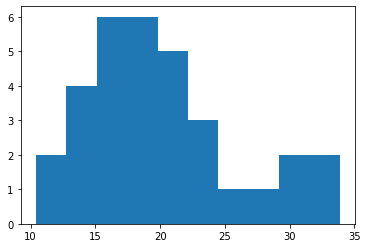

In [34]:
plt.hist(data['mpg'], bins=10)
plt.show()

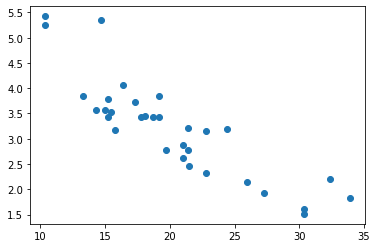

In [36]:
plt.scatter(data['mpg'],data['wt'])
plt.show()

In [35]:
df=pd.DataFrame(data,columns=['gear'])
print(df['gear'].value_counts())

3    15
4    12
5     5
Name: gear, dtype: int64


In [37]:
data.values

array([['Mazda RX4', 21.0, 6, 160.0, 110, 3.9, 2.62, 16.46, 0, 1, 4, 4],
       ['Mazda RX4 Wag', 21.0, 6, 160.0, 110, 3.9, 2.875, 17.02, 0, 1, 4,
        4],
       ['Datsun 710', 22.8, 4, 108.0, 93, 3.85, 2.32, 18.61, 1, 1, 4, 1],
       ['Hornet 4 Drive', 21.4, 6, 258.0, 110, 3.08, 3.215, 19.44, 1, 0,
        3, 1],
       ['Hornet Sportabout', 18.7, 8, 360.0, 175, 3.15, 3.44, 17.02, 0,
        0, 3, 2],
       ['Valiant', 18.1, 6, 225.0, 105, 2.76, 3.46, 20.22, 1, 0, 3, 1],
       ['Duster 360', 14.3, 8, 360.0, 245, 3.21, 3.57, 15.84, 0, 0, 3, 4],
       ['Merc 240D', 24.4, 4, 146.7, 62, 3.69, 3.19, 20.0, 1, 0, 4, 2],
       ['Merc 230', 22.8, 4, 140.8, 95, 3.92, 3.15, 22.9, 1, 0, 4, 2],
       ['Merc 280', 19.2, 6, 167.6, 123, 3.92, 3.44, 18.3, 1, 0, 4, 4],
       ['Merc 280C', 17.8, 6, 167.6, 123, 3.92, 3.44, 18.9, 1, 0, 4, 4],
       ['Merc 450SE', 16.4, 8, 275.8, 180, 3.07, 4.07, 17.4, 0, 0, 3, 3],
       ['Merc 450SL', 17.3, 8, 275.8, 180, 3.07, 3.73, 17.6, 0, 0, 3, 3],
      

In [38]:
data.loc[5:9,'mpg']

5    18.1
6    14.3
7    24.4
8    22.8
9    19.2
Name: mpg, dtype: float64

In [39]:
display(data.loc[1:5])

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [40]:
display(data.iloc[1:5,2:5])

,cyl,disp,hp
1,6,160.0,110
2,4,108.0,93
3,6,258.0,110
4,8,360.0,175


In [41]:
# 1)Draw Scatter Plot between SepalLengthCm and SepalWidthCm for 
# “Iris.csv” file with proper labelling.

data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.show()

FileNotFoundError: ignored

Scikit Learn

In [42]:
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [43]:
iris = datasets.load_iris()

In [44]:
x = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:",feature_names)
print("Target names:",target_names)
print("\nFirst 10 ros of X:\n",x[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 ros of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(
    x,y,test_size=0.4, random_state=1
)

Exercise
Perform the above steps on any other dataset available in Sklearn library

In [47]:
wine = datasets.load_wine()

In [48]:
x = wine.data
y = wine.target

feature_names = iris.feature_names

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=1
)